### Basic Plotting : Line Plots

The most basic plots are line plots. A line can be plotted by calling `plot` on two vectors of numbers.

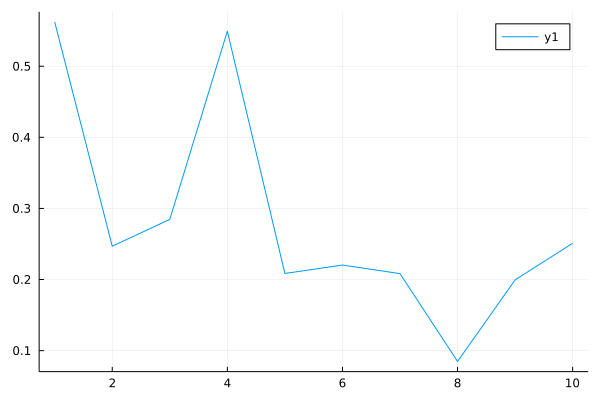

In [2]:
using Plots
x = 1:10; y = rand(10);
plot(x,y)

In Plots.jl, every column is a **series**, ie a set of related points which form lines, surfaces or other primitives. Thus we can plot multiple lines by plotting a matrix of values and each column is interpreted as a separate line : 

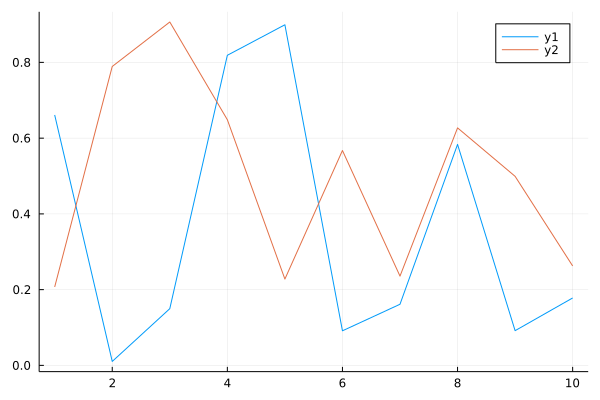

In [3]:
x = 1:10; y = rand(10,2)
plot(x, y)

We can also add more lines by mutating the plot object. This is done by the `!plot` command.

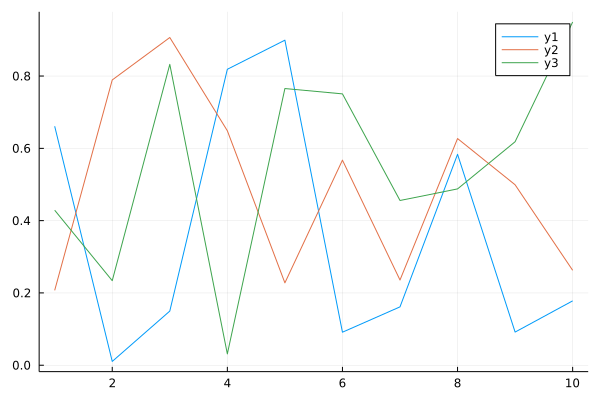

In [4]:
z = rand(10)
plot!(x, z) #mutates the object and add another line 

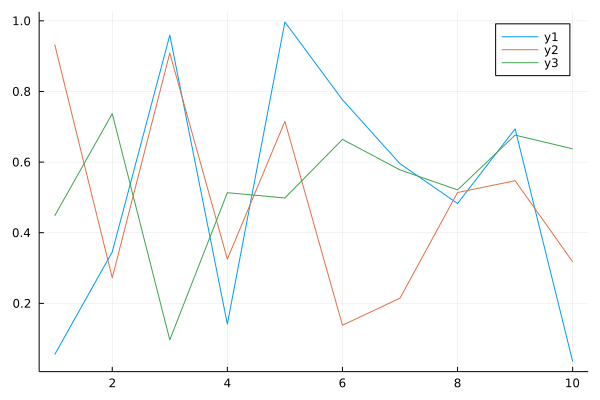

In [5]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
p = plot(x, y)
z = rand(10)
plot!(p, x, z)

### Plot Attributes

In Plots.jl, the modifiers to plots are called **attributes**. These are documented at the [attribute page](https://docs.juliaplots.org/latest/attributes/#attributes). Implicit rule : positionnal arguments are input data, and keyword ones are attributes.

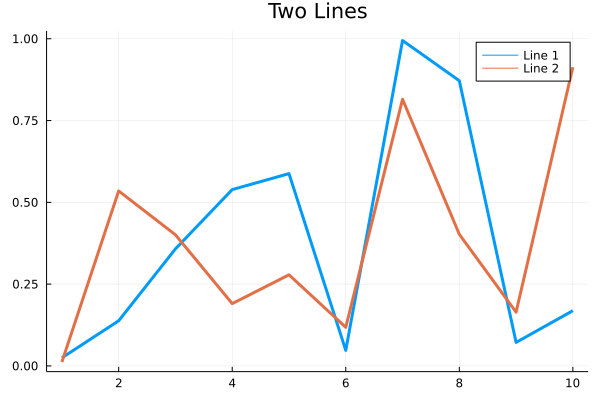

In [7]:
x = 1:10; y = rand(10, 2)
plot(x, y, title = "Two Lines", label = ["Line 1" "Line 2"], lw = 3)

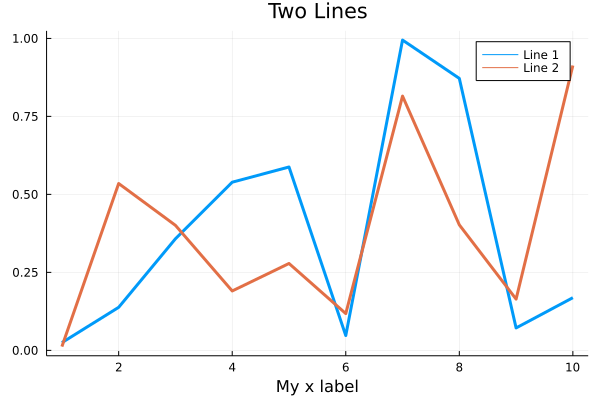

In [8]:
xlabel!("My x label") # with a modifier function

Note that it implicitly uses the global `Plots.CURRENT_PLOT` and we can apply it to other plot objects via `attribute!(p,value)`

### Plotting Backends

Here's a secret: Plots.jl isn't actually a plotting package! Plots.jl is a plotting metapackage: it's an interface over many different plotting libraries. Thus what Plots.jl is actually doing is interpreting your commands and then generating the plots using another plotting library. This plotting library in the background is referred to as the **backend**. The nice thing about this is that this means you can use many different plotting libraries all with the Plots.jl syntax, and we'll see in a little bit that Plots.jl adds new features to each of these libraries!

When we started plotting above, our plot used the default backend GR. However, let's say we want a different plotting backend which will plot into a nice GUI or into the plot pane of VS Code. To do this, we'll need a backend which is compatible with these features. Some common backends for this are PyPlot and Plotly. To install these backends, simply use the standard Julia installation (`Pkg.add("BackendPackage")`). We can specifically choose the backend we are plotting into by using the name of the backend in all lower case as a function. Let's plot the example from above using Plotly and then GR:

In [10]:
x = 1:10; y = rand(10, 2)
plotlyjs() # set the backend to Plotly
plot(x, y, title = "This is Plotted using Plotly")

WebIO._IJuliaInit()

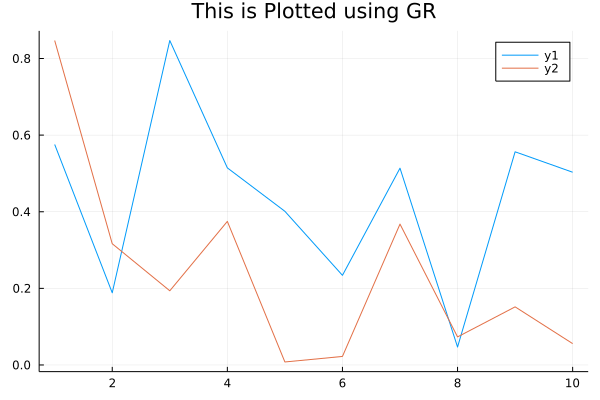

In [11]:
gr() # Set the backend to GR
# This plots using GR
plot(x, y, title = "This is Plotted using GR")

If you're in VS Code or Juno, the first plot command will cause the plot to open in the plot pane. If you're in the REPL, the plot command will open in a browser window. You can always open a GUI anyways by using the `gui()` command.

Each plotting backend has a very different feel. Some have interactivity, some are faster and can deal with huge numbers of datapoints, and some can do 3D plots. Saving plots is done by the `savefig` command. As an example:

In [12]:
savefig("myplot.png") # Saves the CURRENT_PLOT as a .png
savefig(p, "myplot.pdf") # Saves the plot from p as a .pdf vector graphic

Some backends like GR can save to vector graphics and PDFs, while others like Plotly only save to .pngs. For more information on backends, see the [backends page](https://docs.juliaplots.org/latest/backends/#backends). For examples of plots from the various backends, see the Examples section.

### Changing the Plotting Series

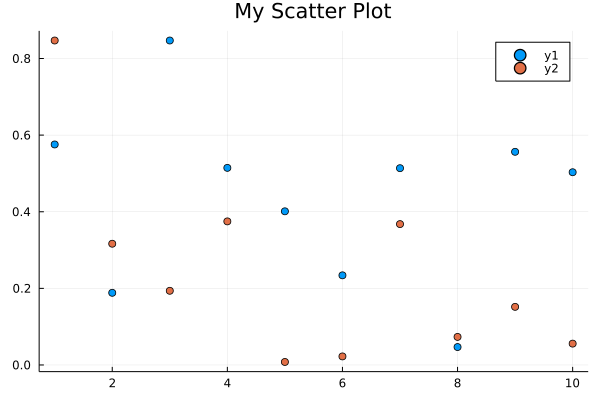

In [13]:
gr() # We will continue onward using the GR backend
plot(x, y, seriestype = :scatter, title = "My Scatter Plot")

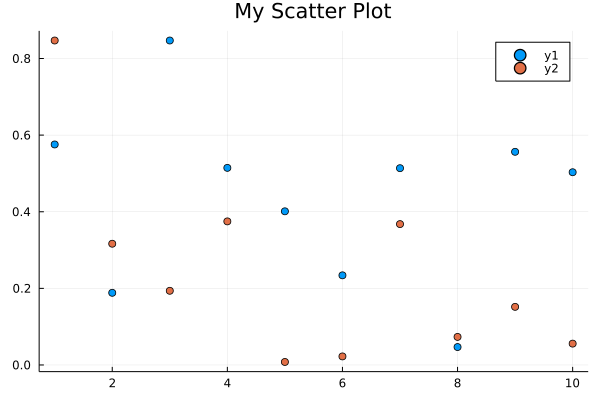

In [14]:
scatter(x, y, title = "My Scatter Plot")

### Plotting in Scripts

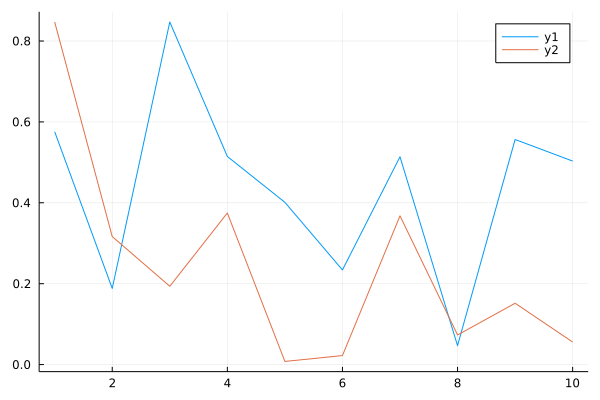

In [15]:
display(plot(x, y))

### Combining Multiple Plots as Subplots